In [19]:
import numpy as np
import matplotlib.pyplot as plt


#単純パーセプトロン
class SimplePerceptron(object):
  
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.w = np.random.normal(size = (input_dim,))
        self.b = 0
        
    def forward(self, x):
        y = step(np.matmul(self.w, x) + self.b)
        return y
    
    def compute_deltas(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = delta * x
        db = delta
        return dw, db
    
def step(x):
    return 1 * (x > 0)


#main関数
#def main():
np.random.seed(123)

#データの準備
d = 2  #入力次元
N = 20  #全データ数

mean = 5

x1 = np.random.randn(N // 2, d) + np.array([0, 0])
x2 = np.random.randn(N // 2, d) + np.array([mean, mean])

t1 = np.zeros(N // 2)
t2 = np.ones(N // 2)

x = np.concatenate((x1, x2), axis = 0)
t = np.concatenate((t1, t2)) 


#モデルの構築
model = SimplePerceptron(input_dim = d)


#モデルの学習
def compute_loss(dw, db):
    return all(dw == 0) * (db == 0)

def train_step(x, t):
    dw, db = model.compute_deltas(x, t)
    loss = compute_loss(dw, db)
    model.w = model.w - dw
    model.b = model.b - db
    return loss

counter = 0

while True:
    classified = True
    for i in range(N):
        loss = train_step(x[i], t[i])
        classified *= loss
    if classified:
        break


#モデルの評価
print("w:", model.w)
print("b:", model.b)

print()

print("(0, 0) => ", model.forward([0, 0]))
print("(5, 5) => ", model.forward([5, 5]))

    
#if __name__ == "__main__":
 #   main()


w: [2.22951939 2.96727454]
b: -13.0

(0, 0) =>  0
(5, 5) =>  1


In [16]:
print(x1, end = "\n\n")
print(x2, end = "\n\n")
print(t1)
print(t2)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]
 [ 1.49138963 -0.638902  ]
 [-0.44398196 -0.43435128]
 [ 2.20593008  2.18678609]
 [ 1.0040539   0.3861864 ]]

[[5.73736858 6.49073203]
 [4.06416613 6.17582904]
 [3.74611933 4.3622485 ]
 [5.9071052  3.5713193 ]
 [4.85993128 4.1382451 ]
 [4.74438063 2.20141089]
 [3.2284669  4.30012277]
 [5.92746243 4.82636432]
 [5.00284592 5.68822271]
 [4.12046366 5.28362732]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


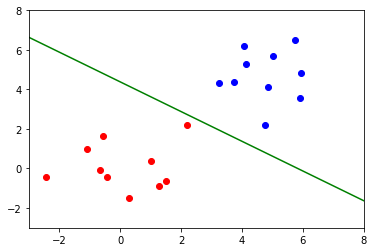

In [18]:
for i in range(10):
    plt.scatter(x1[i, 0], x1[i, 1], color = "red")
    plt.scatter(x2[i, 0], x2[i, 1], color = "blue")
X = np.arange(-3, 9)
Y = - (model.w[0] / model.w[1] * X + model.b / model.w[1])
plt.plot(X, Y, color = "green")
plt.xlim([-3, 8])
plt.ylim([-3, 8])
plt.show()